In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv", encoding = "latin-1")
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless SoirÃ©e Party...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle ArrivÃ©e Femmes Printemps et Ãt...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'Ã©tÃ© Ã lacets taille Ã©lasti...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes BohÃªme Pissenlit Imprime...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'Ã©tÃ© lacent ceint...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,NouveautÃ©s Hommes Siwmwear Beach-Shorts Homme...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'Ã©tÃ© sans manches robes col en ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [ ]:
#Deleting columns with only one value
check=round(df.isnull().sum()/df.shape[0],1)
drop_list=[x for x in check.index if check[x] == 1]
pro=df.drop(drop_list,axis=1)

In [ ]:
#Deleting other unnecessary columns
pro_clean = pro.drop(['title', 'title_orig', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
                      'merchant_name', 'merchant_title', 'merchant_profile_picture', 'product_picture',
                      'product_url', 'shipping_option_name', 'shipping_is_express', 'tags', 'urgency_text',
                      'merchant_info_subtitle', 'currency_buyer', 'product_id', 'theme', 'crawl_month', 'merchant_id',
                      'product_variation_inventory', 'inventory_total', 'rating_five_count', 'rating_four_count', 'rating_three_count',
                      'rating_two_count', 'rating_one_count'], axis =1)
column=[]
for i in pro_clean.columns:
    print(i,len(pro_clean[i].unique()))
    if len(pro_clean[i].unique()) ==1:
        column.append(i)
print(pro_clean[column])

price 127
retail_price 104
units_sold 15
uses_ad_boosts 2
rating 192
rating_count 761
badges_count 4
product_color 102
product_variation_size_id 107
shipping_option_price 8
countries_shipped_to 94
has_urgency_banner 2
origin_country 7
merchant_rating_count 917
merchant_rating 952
merchant_has_profile_picture 2
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1573 rows x 0 columns]


In [ ]:
#distinguish each column' dytype, and if categorical column'null replace 'unknown'
C=(pro_clean.dtypes=='object')
Cate=list(C[C].index)
Integer=(pro_clean.dtypes=='int64')
Float=(pro_clean.dtypes=='float64')
Numer=list(Integer[Integer].index)+list(Float[Float].index)
pro_clean[Cate]=pro_clean[Cate].fillna('unknow')

In [ ]:
#Definition of the values for the standardization of data in size and color columns
def size(x):
    x=x.str.lower().tolist()
    siz=['xxs','xs','s','m','l','xl','xxl','xxxl','xxxxl','xxxxxl','2xl','3xl','4xl','5xl']
    stand_siz=['xxs','xs','s','m','l','xl','xxl','xxxl','xxxxl','xxxxxl']
    for i in range(len(siz)):
        for j in range(len(x)):
            if x[j] == siz[i]:
                x[j]=siz[i]


    for i in range(len(x)):
        if x[i] in stand_siz:
            pass
        elif x[i]=='2xl':
            x[i]='xxl'
        elif x[i]=='3xl':
            x[i]='xxxl'
        elif x[i]=='4xl':
            x[i]='xxxxl'
        elif x[i]=='5xl':
            x[i]='xxxxxl'
        else:
            x[i]='other'
    return x

Color_map  = {'NaN':'Unknown','Black':'black','black':'black','White':'white','white':'white','navyblue':'blue',
             'lightblue':'blue','blue':'blue','skyblue':'blue','darkblue':'blue','navy':'blue','winered':'red',
             'red':'red','rosered':'red','rose':'red','orange-red':'red','lightpink':'pink','pink':'pink',
              'armygreen':'green','green':'green','khaki':'green','lightgreen':'green','fluorescentgreen':'green',
             'gray':'grey','grey':'grey','brown':'brown','coffee':'brown','yellow':'yellow','purple':'purple',
             'orange':'orange','beige':'beige'}

In [ ]:
#Standardization of data in size and color columns
pro_clean['product_variation_size_id']=size(pro_clean['product_variation_size_id'])
pro_clean['product_color']=pro_clean['product_color'].map(Color_map)
print(pro_clean['product_variation_size_id'].unique())
print(pro_clean['product_color'].unique())

['m' 'xs' 's' 'other' 'xxs' 'l' 'xxl' 'xxxxxl' 'xxxl' 'xl' 'xxxxl']
['white' 'green' nan 'black' 'yellow' 'blue' 'beige' 'grey' 'orange' 'red'
 'pink' 'purple' 'brown']


In [ ]:
#Adding a column with the difference between price and retail price (price - retail_price)
pro_clean['gap_price']=(pro_clean['price']-pro_clean['retail_price'])

In [ ]:
for i in pro_clean.columns:
    print(i,len(pro_clean[i].unique()))
    if len(pro_clean[i].unique()) ==1:
        column.append(i)
print(pro_clean[column])

price 127
retail_price 104
units_sold 15
uses_ad_boosts 2
rating 192
rating_count 761
badges_count 4
product_color 13
product_variation_size_id 11
shipping_option_price 8
countries_shipped_to 94
has_urgency_banner 2
origin_country 7
merchant_rating_count 917
merchant_rating 952
merchant_has_profile_picture 2
gap_price 282
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1573 rows x 0 columns]


In [ ]:
pro_clean

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_color,product_variation_size_id,shipping_option_price,countries_shipped_to,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,gap_price
0,16.00,14,100,0,3.76,54,0,white,m,4,34,1.0,CN,568,4.128521,0,2.00
1,8.00,22,20000,1,3.45,6135,0,green,xs,2,41,1.0,CN,17752,3.899673,0,-14.00
2,8.00,43,100,0,3.57,14,0,NaN,xs,3,36,1.0,CN,295,3.989831,0,-35.00
3,8.00,8,5000,1,4.03,579,0,black,m,2,41,NaN,CN,23832,4.020435,0,0.00
4,2.72,3,100,1,3.10,20,0,yellow,s,1,35,1.0,CN,14482,4.001588,0,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,10000,1,4.08,1367,0,blue,s,2,41,NaN,CN,5316,4.224605,0,-3.00
1569,2.00,56,100,1,3.07,28,0,blue,s,1,26,1.0,CN,4435,3.696054,0,-54.00
1570,5.00,19,100,0,3.71,59,0,white,other,2,11,NaN,CN,210,3.961905,0,-14.00
1571,13.00,11,100,0,2.50,2,0,white,other,3,29,NaN,CN,31,3.774194,0,2.00


In [ ]:
pro_clean['product_color_fact'] = pd.factorize(pro_clean.product_color)[0]
pro_clean['product_variation_size_id_fact'] = pd.factorize(pro_clean.product_variation_size_id)[0]
pro_clean['origin_country_fact'] = pd.factorize(pro_clean.origin_country)[0]
pro_clean.drop(['product_color', 'product_variation_size_id', 'origin_country'], inplace=True, axis=1)
pro_clean

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,shipping_option_price,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,gap_price,product_color_fact,product_variation_size_id_fact,origin_country_fact
0,16.00,14,100,0,3.76,54,0,4,34,1.0,568,4.128521,0,2.00,0,0,0
1,8.00,22,20000,1,3.45,6135,0,2,41,1.0,17752,3.899673,0,-14.00,1,1,0
2,8.00,43,100,0,3.57,14,0,3,36,1.0,295,3.989831,0,-35.00,-1,1,0
3,8.00,8,5000,1,4.03,579,0,2,41,NaN,23832,4.020435,0,0.00,2,0,0
4,2.72,3,100,1,3.10,20,0,1,35,1.0,14482,4.001588,0,-0.28,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,10000,1,4.08,1367,0,2,41,NaN,5316,4.224605,0,-3.00,4,2,0
1569,2.00,56,100,1,3.07,28,0,1,26,1.0,4435,3.696054,0,-54.00,4,2,0
1570,5.00,19,100,0,3.71,59,0,2,11,NaN,210,3.961905,0,-14.00,0,3,0
1571,13.00,11,100,0,2.50,2,0,3,29,NaN,31,3.774194,0,2.00,0,3,0


In [ ]:
pro_clean.describe().astype(int)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,shipping_option_price,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,gap_price,product_color_fact,product_variation_size_id_fact,origin_country_fact
count,1573,1573,1573,1573,1573,1573,1573,1573,1573,473,1573,1573,1573,1573,1573,1573,1573
mean,8,23,4339,0,3,889,0,2,40,1,26495,4,0,-14,3,2,0
std,3,30,9356,0,0,1983,0,1,20,0,78474,0,0,29,3,1,0
min,1,1,1,0,1,0,0,1,6,1,0,2,0,-244,-1,0,0
25%,5,7,100,0,3,24,0,2,31,1,1987,3,0,-18,0,1,0
50%,8,10,1000,0,3,150,0,2,40,1,7936,4,0,0,2,2,0
75%,11,26,5000,1,4,855,0,3,43,1,24564,4,0,1,6,2,0
max,49,252,100000,1,5,20744,3,12,140,1,2174765,5,1,7,11,10,6


In [ ]:
pro_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           1573 non-null   float64
 1   retail_price                    1573 non-null   int64  
 2   units_sold                      1573 non-null   int64  
 3   uses_ad_boosts                  1573 non-null   int64  
 4   rating                          1573 non-null   float64
 5   rating_count                    1573 non-null   int64  
 6   badges_count                    1573 non-null   int64  
 7   shipping_option_price           1573 non-null   int64  
 8   countries_shipped_to            1573 non-null   int64  
 9   has_urgency_banner              473 non-null    float64
 10  merchant_rating_count           1573 non-null   int64  
 11  merchant_rating                 1573 non-null   float64
 12  merchant_has_profile_picture    15

In [ ]:
pro_clean.isna().sum()

price                                0
retail_price                         0
units_sold                           0
uses_ad_boosts                       0
rating                               0
rating_count                         0
badges_count                         0
shipping_option_price                0
countries_shipped_to                 0
has_urgency_banner                1100
merchant_rating_count                0
merchant_rating                      0
merchant_has_profile_picture         0
gap_price                            0
product_color_fact                   0
product_variation_size_id_fact       0
origin_country_fact                  0
dtype: int64

In [ ]:
pro_clean = pro_clean.fillna(0)

(array([1447.,  103.,    0.,    0.,   17.,    0.,    0.,    0.,    0.,
           6.]),
 array([1.00000e+00, 1.00009e+04, 2.00008e+04, 3.00007e+04, 4.00006e+04,
        5.00005e+04, 6.00004e+04, 7.00003e+04, 8.00002e+04, 9.00001e+04,
        1.00000e+05]),
 <BarContainer object of 10 artists>)

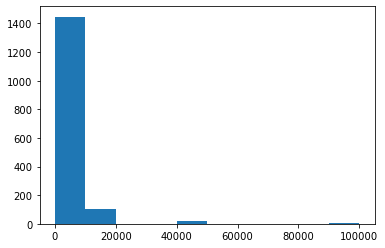

In [ ]:
plt.hist(pro_clean.units_sold)

In [ ]:
from sklearn.model_selection import train_test_split
features = list(pro_clean.columns.values)
features

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'badges_count',
 'shipping_option_price',
 'countries_shipped_to',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture',
 'gap_price',
 'product_color_fact',
 'product_variation_size_id_fact',
 'origin_country_fact']

In [ ]:
features.remove('units_sold')
features

['price',
 'retail_price',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'badges_count',
 'shipping_option_price',
 'countries_shipped_to',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture',
 'gap_price',
 'product_color_fact',
 'product_variation_size_id_fact',
 'origin_country_fact']

In [ ]:
#splitting data into 80-20
X = pro_clean.loc[:, features]
Y = pro_clean.loc[:,['units_sold']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=5, train_size = .8)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:

# define the base models
level0 = list()
level0.append(('KNR', KNeighborsRegressor()))
level0.append(('SVR', SVR()))
level0.append(('dt', DecisionTreeRegressor()))
level0.append(('ln', LinearRegression()))
# level0.append(('xgb', xgb.XGBRegressor(objective="reg:linear")))
# level0.append(('rf',RandomForestRegressor(n_estimators=2000)))
# define meta learner model
# level1 = LinearRegression()
level1 = RandomForestRegressor(n_estimators=2000)

# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=9)


In [ ]:
model.fit(X_train, y_train)
predictions_st = model.predict(X_test)


C:\Users\Tellaeche\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
res = predictions_st.tolist()
result = y_test
result['Prediction'] = res

In [ ]:
result

,units_sold,Prediction
51,1000,2275.750
885,1000,4859.500
756,5000,4790.000
672,10,49.109
1395,100,101.275
...,...,...
470,5000,5962.500
23,5000,4404.400
964,100,99.601
1158,100,139.452


In [ ]:
# result.drop(['pred'], inplace=True, axis=1)

In [ ]:
# result

In [ ]:
1-np.mean(abs(1+result.units_sold - 1+result.Prediction)/1+result.units_sold)

-10867.0676984127

In [ ]:
from sklearn import metrics
print("Mean absolute error =", round(metrics.mean_absolute_error(result.units_sold,  result.Prediction), 2))
print("Mean squared error =", round(metrics.mean_squared_error(result.units_sold,  result.Prediction), 2))
print("Median absolute error =", round(metrics.median_absolute_error(result.units_sold,  result.Prediction), 2))
print("Explain variance score =", round(metrics.explained_variance_score(result.units_sold,  result.Prediction), 2))
print("R2 score =", round(metrics.r2_score(result.units_sold, result.Prediction), 2))

Mean absolute error = 1244.7
Mean squared error = 8521355.12
Median absolute error = 218.0
Explain variance score = 0.82
R2 score = 0.82
